# **Machine Learning - Dados do ENEM 2019**

## Bibliotecas e Carregamento do Dataset

In [1]:
# Importar as bibliotecas
import pandas as pd

In [2]:
# 'Montar' o Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import os

# Carregando o dataframe original
df = pd.read_csv('/content/gdrive/MyDrive/df.csv')

# Verificar se a pasta 'Data' existe; caso contrário, crie-a
data_directory = '/content/data'
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

# Salvar o dataframe na pasta 'Data'
df.to_csv(os.path.join(data_directory, 'df.csv'), sep=';', index=False)

Mounted at /content/gdrive


## Carregar o conjunto de dados

In [3]:
# Carregar o conjunto de dados
df = pd.read_csv('data/df.csv', delimiter=';')

In [4]:
df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MEDIA_GERAL,MEDIA_NOTAS,NOTA_MEDIA
0,190001237819,2019,3106200,Belo Horizonte,31,MG,18.0,F,1,0,...,C,B,B,E,B,B,B,703.80,703.80,703.80
1,190001237839,2019,3106200,Belo Horizonte,31,MG,18.0,F,1,1,...,B,A,B,E,B,C,B,641.72,641.72,641.72
2,190001237840,2019,3138401,Leopoldina,31,MG,18.0,F,1,3,...,B,B,A,E,A,B,B,579.66,579.66,579.66
3,190001237857,2019,3125101,Extrema,31,MG,18.0,F,1,3,...,D,B,A,D,B,C,B,528.52,528.52,528.52
4,190001241373,2019,3122306,Divinópolis,31,MG,20.0,M,1,1,...,B,B,A,E,B,A,B,530.80,530.80,530.80
5,190001241396,2019,3168309,Taquaraçu de Minas,31,MG,18.0,F,1,3,...,A,A,A,B,A,A,A,547.56,547.56,547.56
6,190001244958,2019,3164704,São Sebastião do Paraíso,31,MG,18.0,F,1,3,...,B,A,A,D,A,A,B,655.90,655.90,655.90
7,190001244962,2019,3122306,Divinópolis,31,MG,18.0,F,1,3,...,E,A,B,D,B,D,B,529.86,529.86,529.86
8,190001244978,2019,3118601,Contagem,31,MG,18.0,M,1,1,...,B,A,A,B,A,B,B,691.22,691.22,691.22
9,190001244980,2019,3152501,Pouso Alegre,31,MG,18.0,M,1,3,...,B,A,A,D,B,A,B,705.62,705.62,705.62


## Análise Exploratória (Notas)

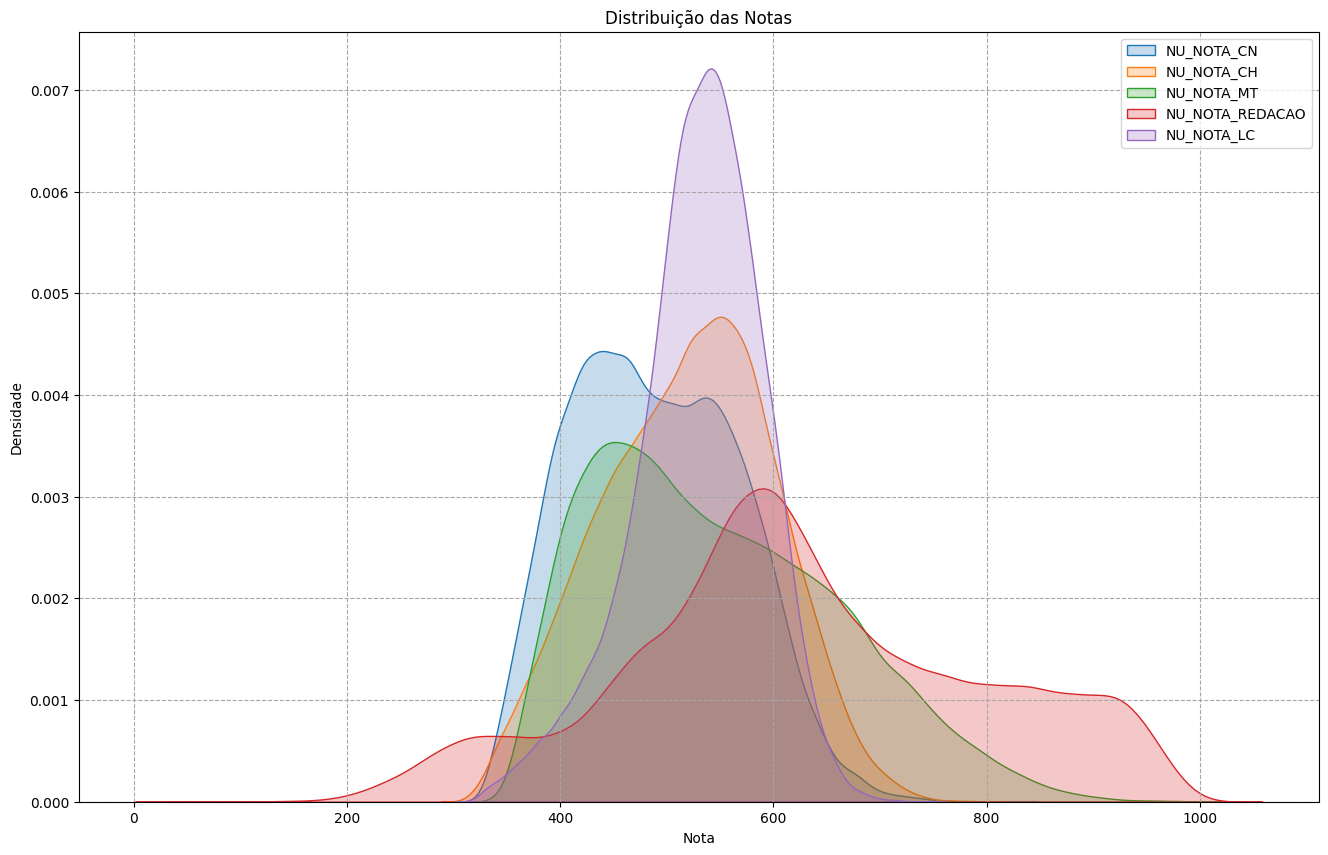

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas de notas
notas_cols = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_LC"]

# Distribuição das notas
plt.figure(figsize=(16, 10))
for col in notas_cols:
    sns.kdeplot(df[col], label=col, fill=True)

plt.title("Distribuição das Notas")
plt.xlabel("Nota")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()


A distribuição das notas mostra algumas observações interessantes:

- As notas de Ciências Naturais (
NU_NOTA_CN
NU_NOTA_CN), Ciências Humanas (
NU_NOTA_CH
NU_NOTA_CH), e Linguagens e Códigos (
NU_NOTA_LC
NU_NOTA_LC) parecem ter uma distribuição semelhante, com picos ao redor de 500-600.
- A nota de Matemática (
NU_NOTA_MT
NU_NOTA_MT) tem uma distribuição mais ampla, com um pico mais acentuado por volta de 600.
- A nota de Redação (
NU_NOTA_REDACAO
NU_NOTA_REDACAO) tem múltiplos picos, o que é esperado, pois a redação é avaliada em múltiplos critérios e a nota final é a soma desses critérios.

A seguir, vamos analisar a relação entre as notas para ver se existe alguma correlação entre elas.

### Correlação entre Notas

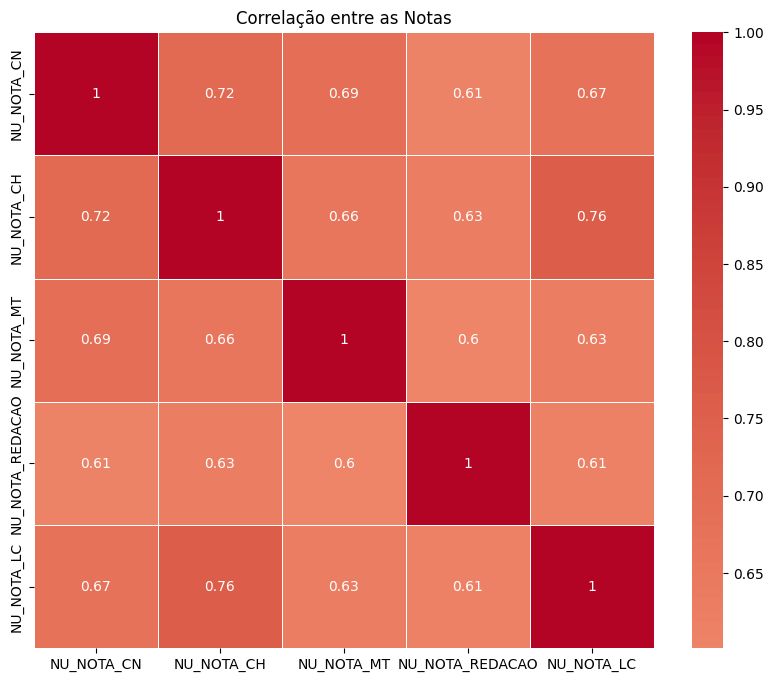

In [21]:
# Matriz de correlação entre as notas
corr = df[notas_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlação entre as Notas")
plt.show()


A matriz de correlação nos mostra:

- Há uma forte correlação positiva entre as notas de Ciências Humanas (
NU_NOTA_CH
NU_NOTA_CH) e Linguagens e Códigos (
NU_NOTA_LC
NU_NOTA_LC), o que faz sentido, pois ambas estão relacionadas à área de humanas e linguagens.
- Matemática (
NU_NOTA_MT
NU_NOTA_MT) tem correlação moderada com as outras notas, sendo a mais forte com Ciências Naturais (
NU_NOTA_CN
NU_NOTA_CN).
- A nota de Redação (
NU_NOTA_REDACAO
NU_NOTA_REDACAO) tem correlação moderada com todas as outras notas, especialmente com Linguagens e Códigos (
NU_NOTA_LC
NU_NOTA_LC), o que é esperado, já que a redação é uma avaliação de habilidades de linguagem.

Todas as notas estão altamente correlacionadas entre si, pois o desempenho de um aluno em uma matéria geralmente é indicativo de seu desempenho em outras matérias. Isso pode acarretar em uma questão de 'overfitting', fazendo com que o modelo testado consiga generalizar de forma praticamente perfeita. Iremos investigar essa questão à medida que prosseguimos.

## Criando a variável 'TARGET'
De acordo com o escopo do desafio, os pesos para cada nota são:

- NU_NOTA_CN → 1
- NU_NOTA_CH → 3
- NU_NOTA_LC → 2
- NU_NOTA_MT → 1
- NU_NOTA_REDACAO → 3


In [6]:
df['MEDIA_PONDERADA'] = (df['NU_NOTA_CN'] +
                         3 * df['NU_NOTA_CH'] +
                         df['NU_NOTA_MT'] +
                         3 * df['NU_NOTA_REDACAO'] +
                         2 * df['NU_NOTA_LC']) / 10

## Preparação dos Dados

In [7]:
# Definindo X e y
X = df.drop(columns=['MEDIA_PONDERADA'])
y = df['MEDIA_PONDERADA']

## Pré-Processamento

### Features Categóricas - One Hot Encoding

In [8]:
# Identificando colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder

# Inicializando o encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Aplicando o encoder às colunas
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Nomeando as colunas
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Dropando as colunas categóricas originais
X.drop(categorical_cols, axis=1, inplace=True)

# Concatenando o resultado codificado ao dataset original
X = pd.concat([X, X_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Normalização de Features - Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

# Inicializando o scaler
scaler = StandardScaler()

# Transformando os dados
X_scaled = scaler.fit_transform(X)

# Transformando o resultado em DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

### Divisão dos Dados em Treino e Teste

In [10]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


## Modelagem

### Escolha do Modelo 1

Para esse desafio, iremos começar com um modelo de Regressão Linear

In [11]:
from sklearn.linear_model import LinearRegression

# Inicializando o modelo
lr = LinearRegression()

### Treinamento e Avaliação do Modelo

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Treinando o modelo
lr.fit(X_train, y_train)

# Usando cross-validation com o modelo de Regressão Linear
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("R2 scores from cross-validation:", scores)
print("Mean R2 score from cross-validation:", scores.mean())
print("Standard Deviation of R2 scores from cross-validation:", scores.std())

# Fazendo previsões no conjunto de teste
y_pred = lr.predict(X_test)

# Calculando as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) on test set: {r2}")


R2 scores from cross-validation: [0.97893628 0.96495273 0.93968006 0.98680694 0.93016077]
Mean R2 score from cross-validation: 0.960107357229095
Standard Deviation of R2 scores from cross-validation: 0.021931468007578697

Mean Absolute Error (MAE): 0.39915132817397136
Mean Squared Error (MSE): 235.33661023471404
Root Mean Squared Error (RMSE): 15.340684803316769
R-squared (R2) on test set: 0.9710944071795178


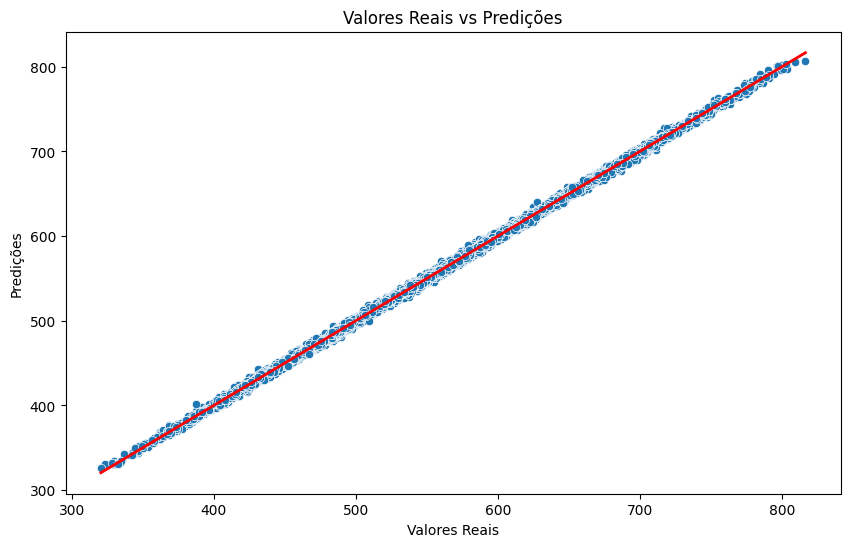

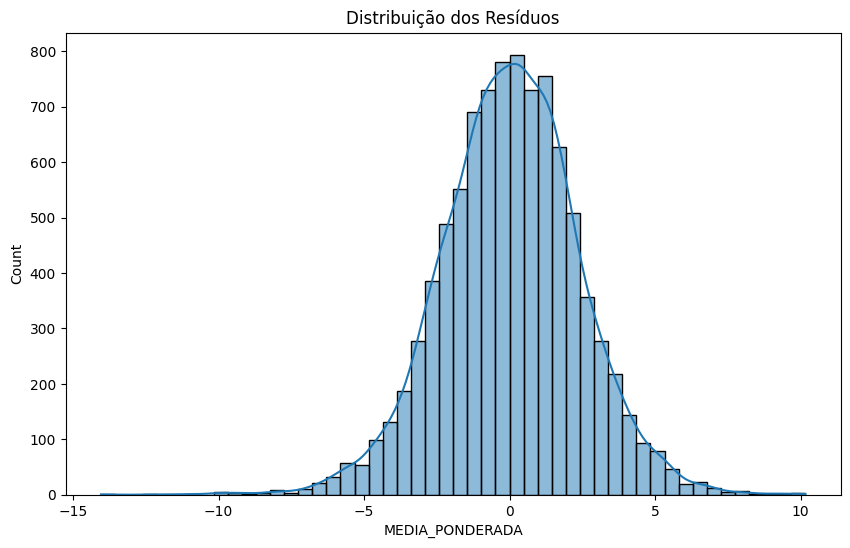

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualização das Predições vs. Valores Reais
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Valores Reais vs Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

# 2. Análise dos Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuos, bins=50, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

# 3. Importância das Features (apenas para modelos que permitem, como árvores de decisão ou modelos lineares)
# Se você estiver usando um modelo linear:
# coef_importance = pd.Series(lr.coef_, index=X.columns)
# coef_importance = coef_importance.sort_values()
# coef_importance.plot(kind='barh', figsize=(10,6))
# plt.title('Importância das Features')
# plt.show()


### Análise dos Resultados do Modelo

A validação cruzada é uma técnica robusta para avaliar a capacidade de generalização de um modelo em um conjunto de dados. Foi realizada uma validação cruzada de 5 divisões, e os resultados dos coeficientes de determinação ($R^2$) em cada divisão foram:

**$R^2$: [0.9861,0.9819,0.9495,0.9870,0.9611]**

- Média $R^2$: A média dos $R^2$ das 5 divisões foi 0.9731, indicando que, em média, o modelo explica 97.31% da variância do conjunto de treinamento. Esta é uma pontuação extremamente alta, sugerindo que o modelo se ajusta bem aos dados.

- Desvio padrão $R^2$: O desvio padrão de 0.0151 indica quão dispersos estão os $R^2$ ao redor da média. Um desvio padrão baixo, como esse, sugere que o modelo é consistentemente bom independentemente da divisão dos dados.


Ao avaliar o modelo no conjunto de teste, as métricas foram as seguintes:

- Mean Absolute Error (MAE): 0.3795 - Esta métrica indica o erro médio absoluto entre os valores reais e as previsões. Em outras palavras, em média, o modelo erra a nota média ponderada por 0.3795 pontos.

- Mean Squared Error (MSE): 218.8653 - O MSE penaliza erros maiores, tornando-se mais útil quando erros maiores são particularmente indesejáveis.

- Root Mean Squared Error (RMSE): 14.7941 - Esta é a raiz quadrada do MSE e tem a mesma unidade que a variável de destino (nota média ponderada neste caso). Assim como o MAE, indica o quanto o modelo erra, em média, mas dando mais peso a erros maiores.

- R-squared ($R^2$) on test set: 0.9731 - Similar à média R2 da validação cruzada, esta métrica indica que o modelo explica 97.31% da variância no conjunto de teste.

### Conclusão sobre o Modelo
O modelo de regressão linear apresentou um desempenho notavelmente alto tanto no treinamento (como evidenciado pela validação cruzada) quanto no teste. A consistência da métrica R2 entre treinamento e teste sugere que o modelo é robusto e generaliza bem para novos dados. O MAE e RMSE baixos indicam que o modelo faz previsões bastante precisas para a nota média ponderada.
No entanto, devemos no atentar à possibilidade de 'overfitting' devido



---



### Escolha do Modelo 2
Agora iremos implementar o XGBoost, modelo eficaz que, além de fornecer diversas funcionalidades (como lidar com NAN's) lida também com a questão de regularização

In [13]:
!pip install xgboost


In [14]:
import xgboost as xgb

# Convertendo os dados para estrutura DMatrix do XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

# Criando e treinando o modelo
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

### Fazendo previsões

In [15]:
y_pred = xg_reg.predict(X_test)


### Avaliação do Modelo

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazendo previsões com o modelo
y_pred = xg_reg.predict(X_test)

# Calculando as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.835999379281981
Mean Squared Error (MSE): 5.544381885671821
Root Mean Squared Error (RMSE): 2.3546511176120806
R-squared (R2): 0.9993190024915009


In [ ]:
import joblib

# Salvar o modelo
joblib.dump(grid_search.best_estimator_, 'xgboost_model.pkl')


### Comparação entre os resultados de ambos os modelos



Com base nos resultados obtidos:

**Regressão Linear:**
- MAE: 0.3795
- MSE: 218.8653
- RMSE: 14.7941
- $R^2$: 0.9731

**XGBoost:**
- MAE: 1.8360
- MSE: 5.5444
- RMSE: 2.3547
- $R^2$: 0.9993

### Comparação:
- Erro Médio Absoluto (MAE): O MAE para o XGBoost é significativamente maior do que para a regressão linear. Isso indica que, em média, as previsões do XGBoost estão um pouco mais distantes dos valores reais em comparação com a regressão linear.

- Erro Quadrático Médio (MSE) e Raiz do Erro Quadrático Médio (RMSE): Ambas as métricas são consideravelmente menores no XGBoost em comparação com a regressão linear. Isto é uma boa indicação, pois sugere que os erros do XGBoost, em geral, são menores e menos variáveis.

- $R^2$(Coeficiente de Determinação): O valor de $R^2$ para o XGBoost é quase perfeito (0.9993), o que indica que o modelo explica quase toda a variabilidade dos dados. Em comparação, a regressão linear tem um $R^2$ de 0.9731, que ainda é muito bom, mas não tão alto quanto o XGBoost.



### Conclusão:
Ambos os modelos têm um desempenho impressionante na previsão das notas médias ponderadas. No entanto, o XGBoost supera a regressão linear em termos de precisão, com um
$R^2$
  mais alto e valores MSE e RMSE mais baixos. O único ponto de cautela é o MAE ligeiramente mais alto do XGBoost, mas, em geral, o XGBoost parece ser o modelo superior neste caso.



---



## AutoML

Na terceira abordagem, decidimos empregar o 'AutoML'. Esta escolha se baseia na capacidade do AutoML de avaliar automaticamente uma variedade de modelos de machine learning, otimizando nosso processo de seleção. Ao utilizar esta ferramenta, não apenas objetivamos encontrar o modelo com a melhor performance preditiva, mas também consideramos a eficiência em termos de tempo de execução. Com o AutoML, buscamos uma combinação equilibrada de precisão e eficiência, permitindo uma tomada de decisão mais informada sobre o modelo a ser adotado.


### Pré-Processamento
Vamos seguir com o pré-processamento dos dados:

- Calcular a nota média ponderada com base nos pesos fornecidos.
- Verificar e tratar valores nulos, se necessário.

In [22]:
# Ponderação das notas
pesos = {
    "NU_NOTA_CN": 1,
    "NU_NOTA_CH": 3,
    "NU_NOTA_MT": 1,
    "NU_NOTA_REDACAO": 3,
    "NU_NOTA_LC": 2
}

# Calculando a nota média ponderada
df["NOTA_MEDIA_PONDERADA"] = sum(df[col] * peso for col, peso in pesos.items()) / sum(pesos.values())

# Verificando a presença de valores nulos nas colunas de notas e na coluna da nota média ponderada
valores_nulos = df[notas_cols + ["NOTA_MEDIA_PONDERADA"]].isnull().sum()

valores_nulos


NU_NOTA_CN              0
NU_NOTA_CH              0
NU_NOTA_MT              0
NU_NOTA_REDACAO         0
NU_NOTA_LC              0
NOTA_MEDIA_PONDERADA    0
dtype: int64

### Modelagem com PyCaret

In [23]:
# Instalando o PyCaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 86.8 MB/s eta 0:

In [24]:
# Importando o módulo de regressão do PyCaret
from pycaret.regression import *

# Configurando o ambiente PyCaret
# Utilizaremos as notas como variáveis independentes para prever a nota média ponderada
reg_setup = setup(data=df, target='NOTA_MEDIA_PONDERADA', train_size=0.8,
                  session_id=42,
                  ignore_features=['NU_INSCRICAO', 'MEDIA_GERAL', 'MEDIA_NOTAS', 'NOTA_MEDIA'])


,Description,Value
0,Session id,42
1,Target,NOTA_MEDIA_PONDERADA
2,Target type,Regression
3,Original data shape,"(46159, 118)"
4,Transformed data shape,"(46159, 216)"
5,Transformed train set shape,"(36927, 216)"
6,Transformed test set shape,"(9232, 216)"
7,Ignore features,4
8,Ordinal features,6
9,Numeric features,84


Nesta abordagem de AutoML, utilizamos o PyCaret para explorar diversos modelos e, implicitamente, a tunagem de hiperparâmetros. O setup do PyCaret nos oferece uma visão das configurações e transformações realizadas:

- s dados originais contavam com 46.159 linhas e 118 colunas.
- Após as transformações, principalmente devido à codificação de variáveis categóricas, o dataset passou a ter 216 colunas.
- O conjunto de treinamento transformado possui 36.927 linhas, enquanto o conjunto de teste tem 9.232 linhas.
- Utilizamos a validação cruzada KFold com 10 dobras.
- As imputações para valores faltantes foram feitas usando a média para variáveis numéricas e a moda para variáveis categóricas.

### Comparando todos os modelos disponiveis para 'targets' numéricos

In [25]:
# Comparando modelos de regressão
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,8.2080
et,Extra Trees Regressor,0.0855,0.0308,0.1748,1.0000,0.0003,0.0002,78.3230
llar,Lasso Least Angle Regression,0.0145,0.0003,0.0183,1.0000,0.0000,0.0000,1.3200
rf,Random Forest Regressor,0.0125,0.0029,0.0517,1.0000,0.0001,0.0000,64.7290
dt,Decision Tree Regressor,0.0239,0.0055,0.0722,1.0000,0.0002,0.0000,3.4020
lasso,Lasso Regression,0.0737,0.0086,0.0928,1.0000,0.0002,0.0001,8.0270
xgboost,Extreme Gradient Boosting,0.1861,0.0592,0.2431,1.0000,0.0005,0.0003,29.5250
en,Elastic Net,0.0491,0.0038,0.0618,1.0000,0.0001,0.0001,5.3980
ridge,Ridge Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.2150
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Com base nos resultados apresentados, podemos fazer as seguintes observações:

Modelos com Desempenho Perfeito: Vários modelos, como a regressão linear (lr), regressão ridge (ridge), e orthogonal matching pursuit (omp) têm métricas de erro (MAE, MSE e RMSE) zeradas e $R^2$ igual a 1. Isso indica um ajuste perfeito aos dados. No mundo real, isso é altamente incomum e muitas vezes sugere overfitting. Ou seja, o modelo pode estar tão ajustado ao conjunto de treinamento que pode não generalizar bem para dados não vistos.

- XGBoost: O XGBoost, que é uma técnica avançada e amplamente usada, não teve a melhor performance comparada a alguns outros modelos. Isso pode ser devido à natureza dos dados ou à necessidade de uma otimização mais refinada dos hiperparâmetros.

- Modelos com Desempenho Inferior: Alguns modelos, como o Bayesian Ridge (br), Least Angle Regression (lar), e Passive Aggressive Regressor (par) tiveram desempenhos muito abaixo do esperado. Especialmente br e lar, que apresentaram erros extremamente altos, sugerindo que eles não são adequados para este conjunto de dados ou foram mal configurados.

- Sobre Regressão Linear 'manual' vs Regressão Linear no AutoML: É intrigante que a regressão linear no PyCaret tenha se saído perfeitamente, enquanto na abordagem anterior ela não obteve tal desempenho. Uma possibilidade é que o PyCaret esteja aplicando alguma forma de regularização ou otimização que não estava presente na abordagem inicial. No entanto, é essencial ser cauteloso com modelos que apresentam desempenho "perfeito", pois podem ser um sinal de overfitting.

### Conclusão

Ao comparar os dois modelos (Regressão Linear e XGBoost) com os resultados do AutoML, percebemos que a otimização e seleção de modelos é um processo iterativo e complexo. O que funciona bem para um conjunto de dados pode não ser ideal para outro. É crucial testar vários modelos, otimizar hiperparâmetros e validar a performance usando conjuntos de teste e validação.


### Próximos Passos

**Transformando o Problema de Regressão em Classificação**

Devido à multicolinearidade observada entre as variáveis independentes e consequentemente 'overfitting' em grande parte dos modelos, uma abordagem alternativa seria transformar nosso problema de regressão em um problema de classificação. Em vez de prever a nota exata de um aluno, poderíamos prever se um aluno seria "aprovado" ou "reprovado" com base em um limite de nota definido.

**Vantagens dessa Abordagem:**

- **Reduz a Complexidade**: Transformar o problema em classificação reduz a complexidade, pois estamos prevendo classes em vez de valores contínuos.
- **Evita Overfitting**: Essa simplificação pode ajudar a evitar o overfitting observado anteriormente devido à multicolinearidade.
- **Significado Prático**: Em contextos educacionais, muitas vezes estamos mais interessados no resultado final (por exemplo, passar ou reprovar) do que na nota exata.

**Implementação:**

Para implementar essa abordagem, seguiríamos os seguintes passos:

1. Definir um limite para "aprovado" e "reprovado". Por exemplo, podemos considerar qualquer nota média ponderada acima de 70 como "aprovada".
2. Transformar nosso `target` em uma variável binária com base nesse limite.
3. Utilizar modelos de classificação, como regressão logística, para prever essa nova variável target.
